<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/K-Nearest-Neighbor/machine_learning_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 농어의 길이만 있어도 무게를 잘 예측할 수 있다고 판단
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3) # 최근접 이웃 개수는 3
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)
print(knr.predict([[50]])) # 길이가 50cm인 농어 무게 예측

[1033.33333333]


1033kg 예측 = 실제론 1.5kg

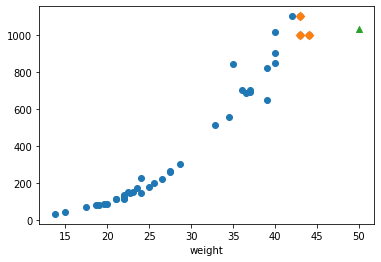

In [4]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[50]])
# 훈련 세트이 산점도를 그린다
plt.scatter(train_input, train_target)
#훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm의 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

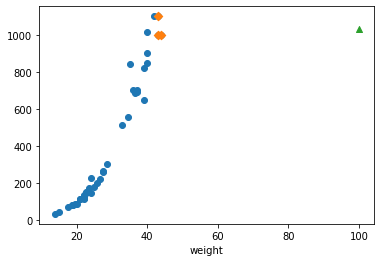

In [5]:
import matplotlib.pyplot as plt
# 100cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[100]])
# 훈련 세트이 산점도를 그린다
plt.scatter(train_input, train_target)
#훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm의 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

선형회귀(liner regression)
# 하나의 직선을 그리기 위해서는 기울기(a)와 절편 (b)

In [9]:
# cooef_기울기(coefficient) / intercept_ 절편
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


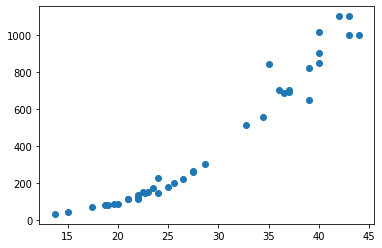

In [7]:
plt.scatter(train_input, train_target)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어 예측
print(lr.predict([[50]]))

[1241.83860323]


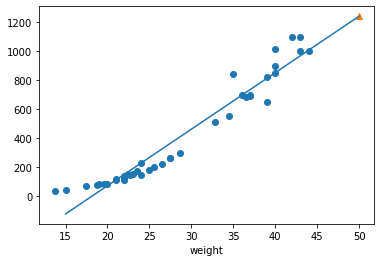

In [11]:
# 훈련 세트의 산점도를 구합니다.
plt.scatter(train_input, train_target)

# 15에서 100까지 1차 방정식 그래프를 그립니다
plt .plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 훈련
lr.fit(train_input, train_target)
# 100cm 농어 예측
print(lr.predict([[100]]))

[3192.69585141]


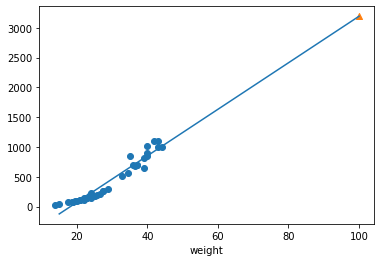

In [12]:
# 훈련 세트의 산점도를 구합니다.
plt.scatter(train_input, train_target)

# 15에서 100까지 1차 방정식 그래프를 그립니다
plt .plot([15, 100], [15*lr.coef_+lr.intercept_, 100*lr.coef_+lr.intercept_])

# 100cm 농어 데이터
plt.scatter(100, 3192.7, marker='^') # 3192.7의 출처는 위 100cm 농어 예측의 결과값
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

#선형 회귀의 문제점
과대적합 및 전체적으로 과소적합

그래프 왼쪽 아래로 쭉 뻗어있음
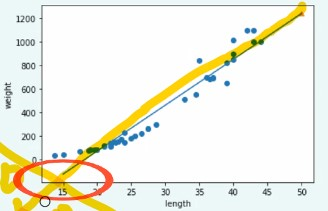

농어의 무게가 0g 이하로 내려감

-> 현실에서 불가능


In [17]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [21]:
# 길이를 제곱한 항을 훈련 세트에 추가
# 넘파이에서 아주 간단히 추가 가능
# column_stack 함수 사용
# 열이 2개: 길이 제곱하여 왼쪽 열 추가

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [24]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [26]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[100**2, 100]]))

[8103.57880667]


In [34]:
# 무게 = 1.01 * 길이² - 21.6 * 길이 + 116.5
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


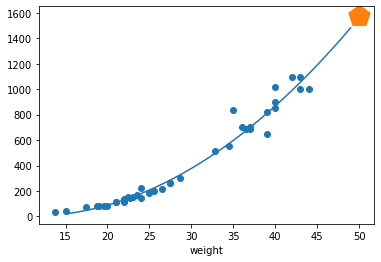

In [44]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50],[1574],marker='p', s = 500)
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

In [35]:
# 훈련 세트와 테스트 세트 R²점수 평가 결과
# 성능이 단순한 선형 회귀보다 휠씬 높아짐(무게 음수 x
# 여전히 테스트 세트 점수가 조금 더 높음 -> 과소적합

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
